In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')
n = 1
data = pd.read_csv('gdrive/My Drive/data_covid19_gob_all.csv')
pd.options.display.max_rows = 999
data

Mounted at /content/gdrive


,date,target_cases,target_d7_cases,target_d14_cases,target_d30_cases,cases_1_before,cases_7_before,cases_14_before,cases_30_before,mm_cases7,mm_cases14,mm_cases30,max_cases7,max_cases14,max_cases30,min_cases7,min_cases14,min_cases30,std_cases7,std_cases14,std_cases30,dayofweek_num,dayofmonth_num
0,2020-03-15,11.0,54.0,109.0,127.0,7,2.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,15
1,2020-03-16,10.0,33.0,84.0,129.0,11,6.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16
2,2020-03-17,18.0,105.0,90.0,106.0,10,9.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17
3,2020-03-18,29.0,115.0,120.0,88.0,18,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,18
4,2020-03-19,22.0,110.0,142.0,122.0,29,10.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,19
5,2020-03-20,30.0,82.0,102.0,62.0,22,7.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,20
6,2020-03-21,62.0,69.0,104.0,94.0,30,7.0,1.0,1.0,26.000000,NaN,NaN,62.0,NaN,NaN,10.0,NaN,NaN,17.710637,NaN,NaN,5,21
7,2020-03-22,54.0,109.0,71.0,160.0,62,11.0,2.0,10.0,32.142857,NaN,NaN,62.0,NaN,NaN,10.0,NaN,NaN,19.047560,NaN,NaN,6,22
8,2020-03-23,33.0,84.0,105.0,119.0,54,10.0,6.0,1.0,35.428571,NaN,NaN,62.0,NaN,NaN,18.0,NaN,NaN,16.389602,NaN,NaN,0,23
9,2020-03-24,105.0,90.0,76.0,137.0,33,18.0,9.0,2.0,47.857143,NaN,NaN,105.0,NaN,NaN,22.0,NaN,NaN,29.059873,NaN,NaN,1,24


In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import random as rn
from sklearn import preprocessing
 
def shuffle_sets(x, y):
  new_index = np.arange(len(x))
  rn.shuffle(new_index)
  x_shuffled = [x[i] for i in new_index]
  y_shuffled = [y[i] for i in new_index]
  return np.array(x_shuffled), np.array(y_shuffled)
 
def split_sets(x,y, test_size=7):
  x_train, x_test, y_train, y_test = x[:-test_size], x[len(x)-test_size:], y[:-test_size], y[len(x)-test_size:]
  return x_train, x_test, y_train, y_test
 
# Convert all to numeric type
y = list(pd.to_numeric(data['target_cases']))
y7d = list(pd.to_numeric(data['target_d7_cases']))
y14d = list(pd.to_numeric(data['target_d14_cases']))
y30d = list(pd.to_numeric(data['target_d30_cases']))
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
 
d = data.drop(['target_cases', 
               'target_d7_cases', 
               'target_d14_cases',
               'target_d30_cases',
               'cases_7_before',
               'cases_14_before',
               'cases_30_before'], axis=1) # Remove columns
 
# Convert to matrix numpy 
x = d.to_numpy()

# Split values
test_size = 7
x_train, x_test, y_train, y_test = split_sets(x[:-30], y[:-30], test_size) # change to 30
x_train7, x_test7, y_train7, y_test7 = split_sets(x[:-30], y7d[:-30], test_size)
x_train14, x_test14, y_train14, y_test14 = split_sets(x[:-30], y14d[:-30], test_size) 
x_train30, x_test30, y_train30, y_test30 = split_sets(x[:-30], y30d[:-30], test_size) 
 
# Shuffle train set
# x_train, y_train = shuffle_sets(x_train[30:], y_train[30:])
# x_train7, y_train7 = shuffle_sets(x_train7[30:], y_train7[30:])
# x_train14, y_train14 = shuffle_sets(x_train14[30:], y_train14[30:])
# x_train30, y_train30 = shuffle_sets(x_train30[30:], y_train30[30:])

# Not shuffle train set 
x_train, y_train = x_train[30:], y_train[30:]
x_train7, y_train7 = x_train7[30:], y_train7[30:]
x_train14, y_train14 = x_train14[30:], y_train14[30:]
x_train30, y_train30 = x_train30[30:], y_train30[30:] 
# Normalize data
x_train_mean = x_train[:,1:].mean()
x_train_std = x_train[:,1:].std()
print(x_train_mean)
print(x_train_std)
print('-------------')
print('Size x_train:',len(x_train))
print('Size x_test:',len(x_test))

4046.8854270550682
4245.66160558835
-------------
Size x_train: 305
Size x_test: 7


In [36]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import *
 
# Function to Print results models
def print_model(model, x_t, y_t, n, lag):   
  predicted = model.predict((x_t[:,1:] - x_train_mean) / x_train_std)
  #predicted = model.predict(x_t[:,1:])
  print('mean_squared_error: ', mean_squared_error(y_t, predicted))
  print('mean_absolute_error: ', mean_absolute_error(y_t, predicted))
  print('r_mean_squared_error: ', mean_squared_error(y_t, predicted, squared=False))
  print('max_error: ', max_error(y_t, predicted))
  print('r_score: ', r2_score(y_t, predicted, multioutput='variance_weighted'))
  
  plt.xlabel('Fecha')
  plt.ylabel('Nuevos casos '+str(n)+' días despues')
  plt.title('Predicción de nuevos casos covid-19 por RandomForestRegressor con lag: '+str(lag))
  plt.plot(x_t[:,0], y_t, label='Real')
  plt.plot(x_t[:,0], predicted, label='Predicho')
  plt.legend(loc='upper left')
  #plt.legend(handles=[line_up, line_down])
  ax = plt.gca()
  plt.xticks(rotation=45)
  plt.show()

### Predict 1 day

In [4]:
from sklearn.preprocessing import StandardScaler
 
# Parameters for GridSearchCV
parameters = {'n_estimators': [5, 5000], 
              'criterion': ['mse', 'mae'], 
              'min_samples_leaf':[5,20],
              'min_samples_split': [5,20],
              'max_depth': [5, 10]}
 
# Create model 1 day
regr = RandomForestRegressor()
clf = GridSearchCV(regr, parameters)

clf.fit((x_train[:,1:] - x_train_mean) / x_train_std, y_train)
 
print('Model parameters found in GridSearch')
for key, value in clf.best_params_.items():
  print(str(key)+': '+ str(value))

Model parameters found in GridSearch
criterion: mse
max_depth: 10
min_samples_leaf: 5
min_samples_split: 5
n_estimators: 5000


In [5]:
from joblib import dump, load
dump(clf, 'gdrive/My Drive/Tp-Final-BDM-QuirogaMario-113329/modelos/lag1_t1')

['gdrive/My Drive/Tp-Final-BDM-QuirogaMario-113329/modelos/lag1_t1']

mean_squared_error:  493760.4832748019
mean_absolute_error:  431.8185148583227
r_mean_squared_error:  702.6809256517512
max_error:  4962.9776221548855
r_score:  0.9721470239458572


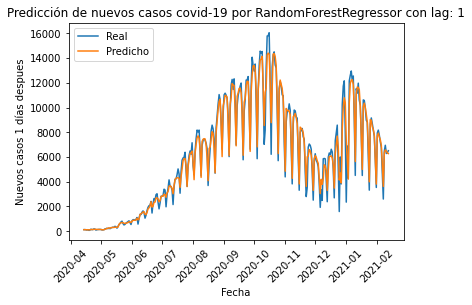

In [37]:
n=1
# Evaluate with train set
print_model(clf, x_train, y_train, 1, n)

mean_squared_error:  2055018.9009404497
mean_absolute_error:  1389.141783649132
r_mean_squared_error:  1433.5337111280116
max_error:  1997.3575858442737
r_score:  0.36431867832225084


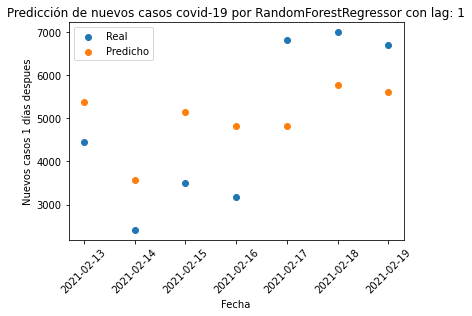

Fecha-------------- Real---- Predicho
2021-02-13 00:00:00 4445.0 5384
2021-02-14 00:00:00 2414.0 3571
2021-02-15 00:00:00 3499.0 5150
2021-02-16 00:00:00 3165.0 4817
2021-02-17 00:00:00 6808.0 4810
2021-02-18 00:00:00 6994.0 5758
2021-02-19 00:00:00 6704.0 5614


In [7]:
print_model(clf, x_test[:7], y_test[:7], 1, n)
print('Fecha--------------', 'Real----', 'Predicho')

#for i, y_pred in enumerate(clf.predict(x_test[:,1:])):
for i, y_pred in enumerate(clf.predict((x_test[:,1:] - x_train_mean) / x_train_std)):
  print(x_test[i,0], y_test[i], int(y_pred))

In [8]:
# Create model 7 day
regr7 = RandomForestRegressor()
clf7 = GridSearchCV(regr7, parameters)
clf7.fit((x_train7[:,1:] - x_train_mean) / x_train_std, y_train7)
 
print('Model parameters found in GridSearch')
for key, value in clf7.best_params_.items():
  print(str(key)+': '+ str(value))

Model parameters found in GridSearch
criterion: mse
max_depth: 10
min_samples_leaf: 5
min_samples_split: 5
n_estimators: 5000


mean_squared_error:  562964.528285974
mean_absolute_error:  489.6675701531719
r_mean_squared_error:  750.3096216136203
max_error:  3413.7845297321546
r_score:  0.9668968424323766


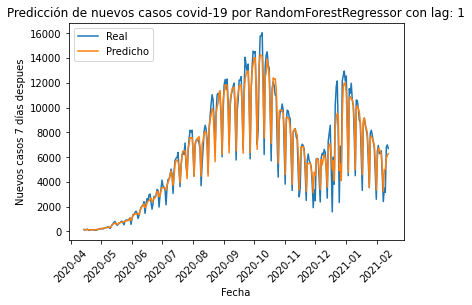

In [38]:
n=1
# Evaluate with train set
print_model(clf7, x_train7, y_train7, 7, n)

mean_squared_error:  1145618.8651756295
mean_absolute_error:  1022.5295993848503
r_mean_squared_error:  1070.3358655934264
max_error:  1587.9749053151918
r_score:  0.35803074827272735


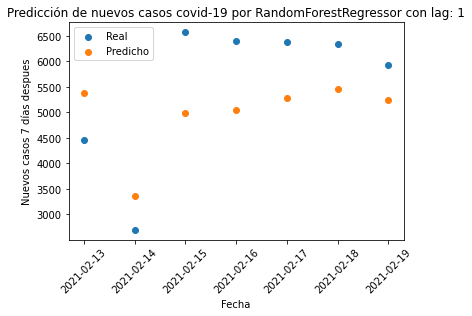

Fecha-------------- Real---- Predicho
2021-02-13 00:00:00 4459.0 5379
2021-02-14 00:00:00 2697.0 3354
2021-02-15 00:00:00 6567.0 4979
2021-02-16 00:00:00 6388.0 5045
2021-02-17 00:00:00 6373.0 5286
2021-02-18 00:00:00 6328.0 5459
2021-02-19 00:00:00 5930.0 5234


In [10]:
print_model(clf7, x_test7[:7], y_test7[:7], 7, n)
print('Fecha--------------', 'Real----', 'Predicho')

#for i, y_pred in enumerate(clf.predict(x_test[:,1:])):
for i, y_pred7 in enumerate(clf7.predict((x_test7[:,1:] - x_train_mean) / x_train_std)):
  print(x_test7[i,0], y_test7[i], int(y_pred7))

In [11]:
from joblib import dump, load
dump(clf, 'gdrive/My Drive/Tp-Final-BDM-QuirogaMario-113329/modelos/lag1_t7')

['gdrive/My Drive/Tp-Final-BDM-QuirogaMario-113329/modelos/lag1_t7']

In [12]:
# Create model 14 day
regr14 = RandomForestRegressor()
clf14 = GridSearchCV(regr14, parameters)
clf14.fit((x_train14[:,1:] - x_train_mean) / x_train_std, y_train14)
 
print('Model parameters found in GridSearch')
for key, value in clf14.best_params_.items():
  print(str(key)+': '+ str(value))

Model parameters found in GridSearch
criterion: mse
max_depth: 10
min_samples_leaf: 5
min_samples_split: 5
n_estimators: 5000


In [13]:
from joblib import dump, load
dump(clf, 'gdrive/My Drive/Tp-Final-BDM-QuirogaMario-113329/modelos/lag1_t14')

['gdrive/My Drive/Tp-Final-BDM-QuirogaMario-113329/modelos/lag1_t14']

mean_squared_error:  587535.1325515123
mean_absolute_error:  481.86285771309247
r_mean_squared_error:  766.5084034448105
max_error:  4610.066329734376
r_score:  0.9637427593178569


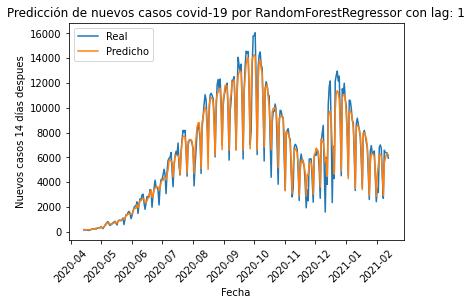

In [39]:
n=1
# Evaluate with train set
print_model(clf14, x_train14, y_train14, 14, n)

mean_squared_error:  736730.2514651598
mean_absolute_error:  738.3154337313672
r_mean_squared_error:  858.3299199405551
max_error:  1527.42612985888
r_score:  0.7059967885388221


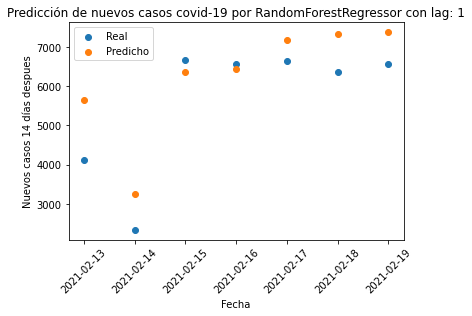

Fecha-------------- Real---- Predicho
2021-02-13 00:00:00 4122.0 5649
2021-02-14 00:00:00 2334.0 3239
2021-02-15 00:00:00 6670.0 6368
2021-02-16 00:00:00 6566.0 6451
2021-02-17 00:00:00 6650.0 7172
2021-02-18 00:00:00 6367.0 7344
2021-02-19 00:00:00 6560.0 7379


In [15]:
print_model(clf14, x_test14[:7], y_test14[:7], 14, n)
print('Fecha--------------', 'Real----', 'Predicho')

#for i, y_pred in enumerate(clf.predict(x_test[:,1:])):
for i, y_pred14 in enumerate(clf14.predict((x_test14[:,1:] - x_train_mean) / x_train_std)):
  print(x_test14[i,0], y_test14[i], int(y_pred14))

In [16]:
# Create model 30 day
regr30 = RandomForestRegressor()
clf30 = GridSearchCV(regr30, parameters)
clf30.fit((x_train30[:,1:] - x_train_mean) / x_train_std, y_train30)
 
print('Model parameters found in GridSearch')
for key, value in clf30.best_params_.items():
  print(str(key)+': '+ str(value))

Model parameters found in GridSearch
criterion: mse
max_depth: 10
min_samples_leaf: 5
min_samples_split: 5
n_estimators: 5000


In [17]:
from joblib import dump, load
dump(clf, 'gdrive/My Drive/Tp-Final-BDM-QuirogaMario-113329/modelos/lag1_t30')

['gdrive/My Drive/Tp-Final-BDM-QuirogaMario-113329/modelos/lag1_t30']

mean_squared_error:  826072.5027288221
mean_absolute_error:  623.4119777454656
r_mean_squared_error:  908.885307796766
max_error:  5025.797971045906
r_score:  0.9424273343306265


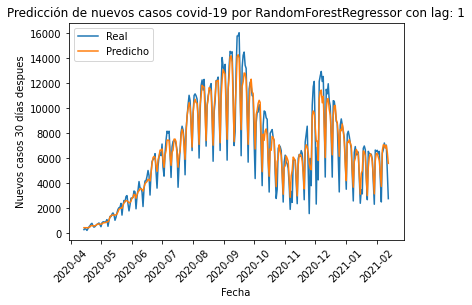

In [43]:
n=1
# Evaluate with train set
print_model(clf30, x_train30, y_train30, 30, n)

mean_squared_error:  7339126.065158987
mean_absolute_error:  2661.7919432357917
r_mean_squared_error:  2709.082144409613
max_error:  3495.242892843701
r_score:  -1.8458652589010702


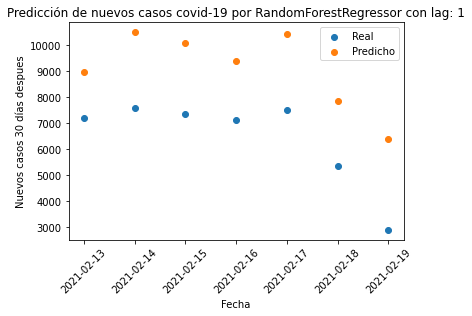

Fecha-------------- Real---- Predicho
2021-02-13 00:00:00 7197.0 8990
2021-02-14 00:00:00 7592.0 10508
2021-02-15 00:00:00 7370.0 10104
2021-02-16 00:00:00 7116.0 9383
2021-02-17 00:00:00 7494.0 10428
2021-02-18 00:00:00 5350.0 7840
2021-02-19 00:00:00 2900.0 6395


In [19]:
print_model(clf30, x_test30[:7], y_test30[:7], 30, n)
print('Fecha--------------', 'Real----', 'Predicho')

#for i, y_pred in enumerate(clf.predict(x_test[:,1:])):
for i, y_pred30 in enumerate(clf30.predict((x_test30[:,1:] - x_train_mean) / x_train_std)):
  print(x_test30[i,0], y_test30[i], int(y_pred30))

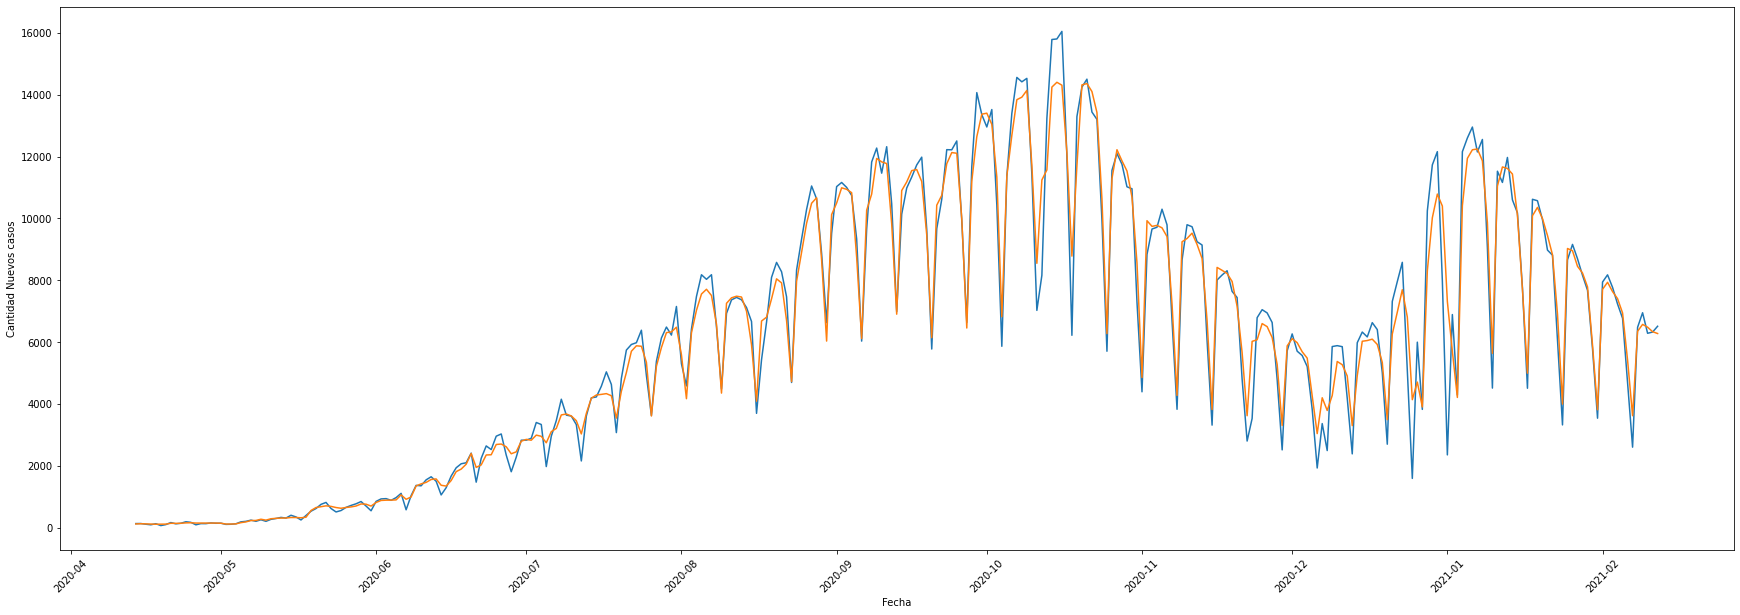

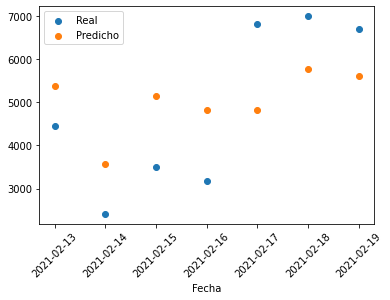

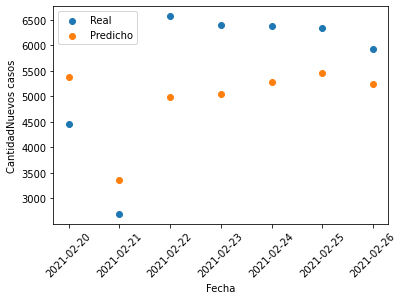

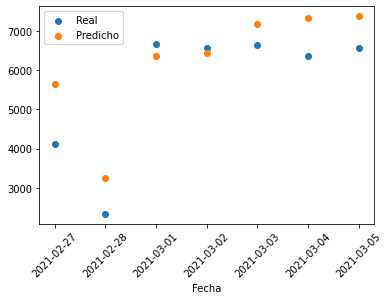

In [24]:

from datetime import datetime, timedelta
plt.figure(figsize=(30,10))

#plt.subplot(1, 4, 1)
plt.xlabel('Fecha')
plt.ylabel('Cantidad Nuevos casos')
predicted = clf.predict((x_train[:,1:] - x_train_mean) / x_train_std)
line_up = plt.plot(x_train[:,0], y_train[:], label='Real')
line_down = plt.plot(x_train[:,0], predicted[:], label='Predicho')



#plt.legend(handles=[line_up, line_down])
ax = plt.gca()
plt.xticks(rotation=45)
plt.show()
#plt.subplot(1, 4, 2)
plt.xlabel('Fecha')
#plt.ylabel('CantidadNuevos casos')

predicted = clf.predict((x_test[:,1:] - x_train_mean) / x_train_std)
line_up = plt.scatter(x_test[:,0], y_test[:], label='Real')
line_down = plt.scatter(x_test[:,0], predicted, label='Predicho')
plt.legend(handles=[line_up, line_down])
ax = plt.gca()
plt.xticks(rotation=45)
plt.show()
#plt.subplot(1, 4, 3)
plt.xlabel('Fecha')
plt.ylabel('CantidadNuevos casos')

predicted = clf7.predict((x_test7[:,1:] - x_train_mean) / x_train_std)
line_up = plt.scatter(x_test7[:,0]+timedelta(days=7), y_test7[:], label='Real')
line_down = plt.scatter(x_test7[:,0]+timedelta(days=7), predicted, label='Predicho')
plt.legend(handles=[line_up, line_down])
ax = plt.gca()
plt.xticks(rotation=45)
plt.show()
#plt.subplot(1, 4, 4)
plt.xlabel('Fecha')
#plt.ylabel('CantidadNuevos casos')

predicted = clf14.predict((x_test14[:,1:] - x_train_mean) / x_train_std)
line_up = plt.scatter(x_test14[:,0]+timedelta(days=14), y_test14[:], label='Real')
line_down = plt.scatter(x_test14[:,0]+timedelta(days=14), predicted, label='Predicho')
plt.legend(handles=[line_up, line_down])
ax = plt.gca()
plt.xticks(rotation=45)

plt.show()

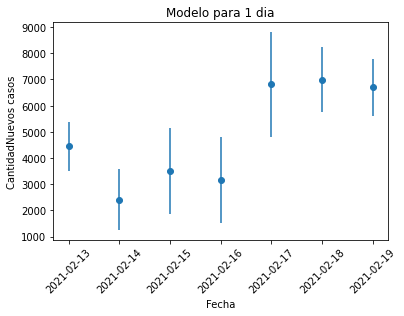

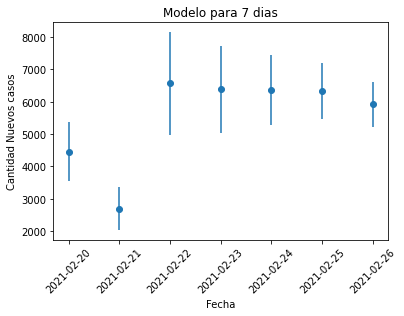

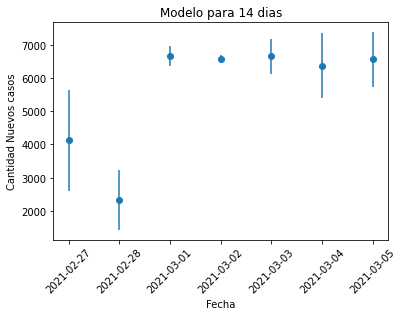

In [27]:
#plt.figure(figsize=(30,5))
#plt.subplot(1, 4, 2)
plt.ylabel('CantidadNuevos casos')
plt.xlabel('Fecha')
#plt.ylabel('CantidadNuevos casos')
plt.title('Modelo para 1 dia')

#errorbar(x, y, yerr, marker='s', mfc='red',
#         mec='green', ms=20, mew=4)

predicted = clf.predict((x_test[:,1:] - x_train_mean) / x_train_std)
predicted = np.abs(y_test-predicted)
line_up = plt.errorbar(x_test[:,0], y_test[:],predicted, fmt='o')
#line_down = plt.scatter(x_test[:,0], predicted, label='Predicho')
#plt.legend(handles=[line_up, line_down])
ax = plt.gca()
plt.xticks(rotation=45)
plt.show()

#plt.subplot(1, 4, 3)
plt.xlabel('Fecha')
plt.ylabel('Cantidad Nuevos casos')
plt.title('Modelo para 7 dias')
predicted = clf7.predict((x_test7[:,1:] - x_train_mean) / x_train_std)
predicted = np.abs(y_test7-predicted)
line_up = plt.errorbar(x_test7[:,0]+timedelta(days=7), y_test7[:],predicted, fmt='o')
#line_up = plt.scatter(x_test7[:,0]+timedelta(days=7), y_test7[:], label='Real')
#line_down = plt.scatter(x_test7[:,0]+timedelta(days=7), predicted, label='Predicho')
#plt.legend(handles=[line_up, line_down])
ax = plt.gca()
plt.xticks(rotation=45)
plt.show()

#plt.subplot(1, 4, 4)
plt.xlabel('Fecha')
plt.ylabel('Cantidad Nuevos casos')
#plt.ylabel('CantidadNuevos casos')
plt.title('Modelo para 14 dias')
predicted = clf14.predict((x_test14[:,1:] - x_train_mean) / x_train_std)
predicted = np.abs(y_test14-predicted)
line_up = plt.errorbar(x_test14[:,0]+timedelta(days=14), y_test14[:],predicted, fmt='o')
#line_up = plt.scatter(x_test14[:,0]+timedelta(days=14), y_test14[:], label='Real')
#line_down = plt.scatter(x_test14[:,0]+timedelta(days=14), predicted, label='Predicho')
#plt.legend(handles=[line_up, line_down])
ax = plt.gca()
plt.xticks(rotation=45)

plt.show()

<BarContainer object of 15 artists>

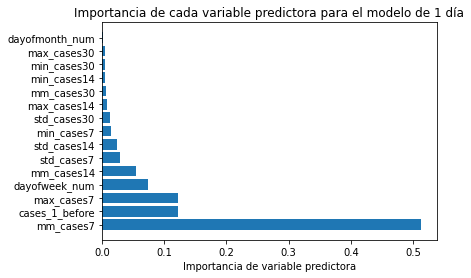

In [56]:
cols = list(d.columns[1:])
scores = list(clf.best_estimator_.feature_importances_)
c = list(zip(scores, cols))
c_sorted = sorted(c, reverse=True)
n_scores, n_cols = zip(*c_sorted)
plt.xlabel('Importancia de variable predictora')
plt.title('Importancia de cada variable predictora para el modelo de 1 día')
plt.barh(n_cols, n_scores)

<BarContainer object of 15 artists>

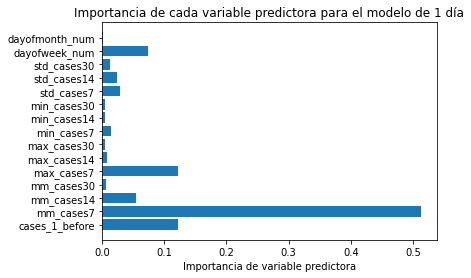

In [45]:
cols = list(d.columns[1:])
scores = list(clf.best_estimator_.feature_importances_)
c = list(zip(scores, cols))
c_sorted = sorted(c, reverse=True)
n_scores, n_cols = zip(*c_sorted)
plt.xlabel('Importancia de variable predictora')
plt.title('Importancia de cada variable predictora para el modelo de 1 día')
plt.barh(cols, scores)

<BarContainer object of 15 artists>

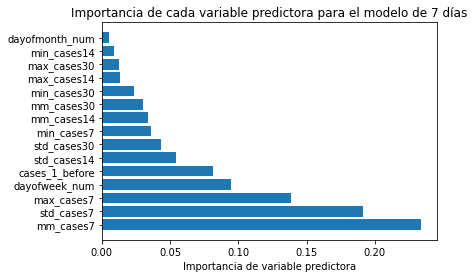

In [59]:
cols = list(d.columns[1:])
scores = list(clf7.best_estimator_.feature_importances_)
c = list(zip(scores, cols))
c_sorted = sorted(c, reverse=True)
n_scores, n_cols = zip(*c_sorted)
plt.xlabel('Importancia de variable predictora')
plt.title('Importancia de cada variable predictora para el modelo de 7 días')
plt.barh(n_cols, n_scores)

<BarContainer object of 15 artists>

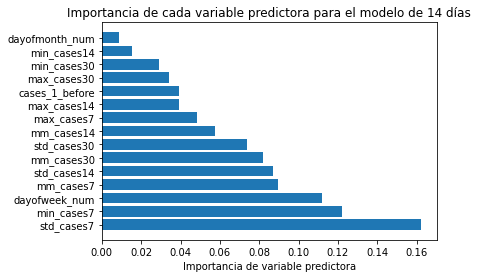

In [58]:
cols = list(d.columns[1:])
scores = list(clf14.best_estimator_.feature_importances_)
c = list(zip(scores, cols))
c_sorted = sorted(c, reverse=True)
n_scores, n_cols = zip(*c_sorted)
plt.xlabel('Importancia de variable predictora')
plt.title('Importancia de cada variable predictora para el modelo de 14 días')
plt.barh(n_cols, n_scores)